# Overview
<p><p><p><p><p><p><p><p>



---

## Detour


---

## Benoît and the Beast



In [11]:
%use lib-ext(0.12.0-93)
LATEX("z_{n+1} = z_n^2 + c")

🪨 a complex number c is a member of the [Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set#cite_note-13) set if, when starting with z0 = 0 and applying the iteration repeatedly, the absolute value of zn remains bounded for all n>0
 ![Mandelbrot](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Mandel_zoom_00_mandelbrot_set.jpg/480px-Mandel_zoom_00_mandelbrot_set.jpg)
 ![Mandelbrot seahorse valley](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Mandel_zoom_01_head_and_shoulder.jpg/480px-Mandel_zoom_01_head_and_shoulder.jpg)
 ![Mandelbrot seahorse antenna](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Mandel_zoom_08_satellite_antenna.jpg/480px-Mandel_zoom_08_satellite_antenna.jpg)


## Lindenmayer



In [12]:
import net.maiatoday.forestwalk.lsystem.plant

val p = plant {
    seed = "🪨"
    rules = mapOf(
        "🪨" to "🪨🌱",
        "🌱🌱🌱🌱" to "🌲🌱🪨🪨",
        "🌱🌲🌱" to "🌳",
        "🪨🪨🪨" to "🐿️"
    )
}
p.grow(13)
p.bluePrint

🪨🌱🌱🌱🌳🪨🌲🌱🐿️🌲🌱🪨🪨🌳🪨🌲🌱🪨🪨🌳🐿️🌲🌱🪨🌳🐿️🌲🌱🪨🌱🪨🌱

---

## Turtle Tortoise Terrapin
![TurtleTortoiseTerrapin](https://africageographic.com/wp-content/uploads/2019/02/Decoding-Science-Turtle-tortoise-terrapin.jpg)
Turtles [vs](https://www.diffen.com/difference/Tortoise_vs_Turtle) Tortoises [vs](https://africageographic.com/stories/whats-the-difference-between-turtles-tortoises-and-terrapins/) Terrapins


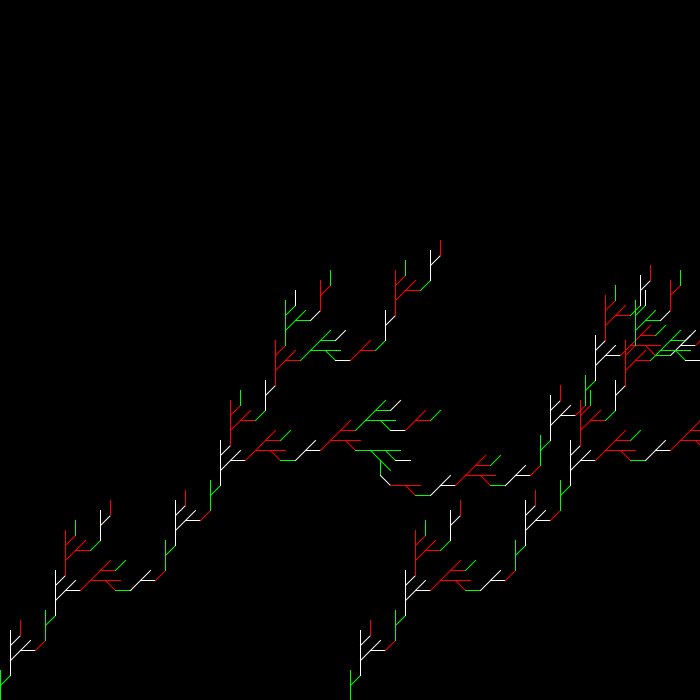

In [22]:
import net.maiatoday.forestwalk.lsystem.goTortoise
import net.maiatoday.forestwalk.lsystem.plant
import net.maiatoday.forestwalk.tools.canvas
import java.awt.Color

val p = plant {
    seed = "F"
    rules = mapOf(
        "F" to "F[F]-F`+F"
    )
    grow(4)
}

val penColors = listOf(Color.GREEN, Color.WHITE, Color.RED)

canvas(700, 700) { width, height -> 
    goTortoise(
        startX = 0,  
        startY = height,
        angleChange = Math.PI/4,
        length = 15,
        plant = p, 
        penColors = penColors
    )
    goTortoise(
        startX = width/2,  
        startY = height,
        angleChange = Math.PI/4,
        length = 15,
        plant = p, 
        penColors = penColors
    )
}


## Stochastic Squirrel



## Seedlings to Forest



## Share